In [1]:
# Code to unzip a TAR file on Windows or Mac. NOTE: Run only once to unzip
import tarfile 
# file = tarfile.open('VIAJES/202202_Viajes_distritos.tar') # open file, a zipped folder containing all data monthly (typically in .tar format)
# file.extractall('VIAJES/basicos_distritos_viajes_202202') # extracting file, unzipped folder containing several files
# file.close() 

In [2]:
import config as cfg
import matplotlib.pyplot as plt
import pandas as pd
from utils import get_overview, open_gz, open_gz_by_district, filter_district

In [3]:
geometria_dir = cfg.GEOMETRIA_DATA
personas_dir = cfg.PERSONAS_DATA
viajes_dir = cfg.VIAJES_DATA

In [7]:
# get_overview(viajes)

In [4]:
# FIXME: Read more about DtypeWarning and fix
viajes = open_gz_by_district(viajes_dir / 'basicos_distritos_viajes_202202', [6,7,8,9,10], district_code='28079') # substracting trips in Madrid districts during day 7 to 11 of Feb 

/Users/caro/Desktop/thesis_project/mobility_data/utils.py:64: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, compression='gzip', sep='|')
/Users/caro/Desktop/thesis_project/mobility_data/utils.py:64: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, compression='gzip', sep='|')
/Users/caro/Desktop/thesis_project/mobility_data/utils.py:64: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, compression='gzip', sep='|')
/Users/caro/Desktop/thesis_project/mobility_data/utils.py:64: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, compression='gzip', sep='|')
/Users/caro/Desktop/thesis_project/mobility_data/utils.py:64: DtypeWarning: Columns (2) have mixed types. Specify dt

In [5]:
all_viajes = pd.concat(viajes, ignore_index=True)

In [6]:
all_viajes.shape

(3182591, 15)

In [7]:
all_viajes.head()

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
0,20220207,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,0-25,hombre,20.700,14.144
1,20220207,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,0-25,mujer,25.476,15.796
2,20220207,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,25-45,hombre,102.263,69.730
3,20220207,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,25-45,mujer,86.178,63.775
4,20220207,0,2807901,2807901,0.5-2,casa,frecuente,no,no,28,>15,45-65,hombre,43.469,31.687


In [8]:
all_viajes.tail()

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
3182586,20220211,23,2807921,2807921,2-10,trabajo_estudio,frecuente,no,no,28,10-15,25-45,mujer,3.494,7.943
3182587,20220211,23,2807921,2807921,2-10,trabajo_estudio,frecuente,no,no,28,10-15,45-65,NaN,1.902,6.312
3182588,20220211,23,2807921,2807921,2-10,trabajo_estudio,frecuente,no,no,28,>15,25-45,mujer,3.306,10.835
3182589,20220211,23,2807921,2807921,2-10,trabajo_estudio,frecuente,no,no,28,>15,45-65,mujer,2.692,5.656
3182590,20220211,23,2807921,2807921,2-10,trabajo_estudio,frecuente,no,no,28,>15,65-100,hombre,2.004,4.713


In [9]:
all_viajes.describe()

,fecha,periodo,residencia,viajes,viajes_km
count,3.182591e+06,3.182591e+06,3.182591e+06,3.182591e+06,3.182591e+06
mean,2.022021e+07,1.349655e+01,2.803398e+01,1.379581e+01,4.194190e+01
std,1.433127e+00,5.504580e+00,4.169659e+00,3.493528e+01,6.341464e+01
min,2.022021e+07,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.022021e+07,1.000000e+01,2.800000e+01,3.253000e+00,1.004300e+01
50%,2.022021e+07,1.400000e+01,2.800000e+01,5.780000e+00,2.313700e+01
75%,2.022021e+07,1.800000e+01,2.800000e+01,1.125400e+01,4.722900e+01
max,2.022021e+07,2.300000e+01,5.200000e+01,1.347302e+03,2.100646e+03


In [10]:
# IMPORTANT: when filtering only those who travel from home, the residence is only the province of Madrid
all_viajes[all_viajes['actividad_origen']=='casa'].residencia.value_counts()

residencia
28    781697
Name: count, dtype: int64

In [11]:
all_viajes[all_viajes['actividad_destino']=='casa'].residencia.value_counts()

residencia
28    793029
Name: count, dtype: int64

In [12]:
all_viajes.to_csv('viajes/all_viajes_week_0222.csv', index=False)

In [28]:
#NOTE: The residence of the users in the MITMA data is not by district, but by province. 
# This could be a problem as I am trying to understand how people from different districts move. 
# As a solution, I could filter to only use ‘origen’ == casa or ‘destino’==casa in the districts of Madrid. 
# This way, I could make sure that I am taking a look at those records of people who actually live in a specific district in Madrid.
# The problem is that the mobility would be very limited to those trips either coming from or going home.
filtered_df = all_viajes.loc[(all_viajes['actividad_origen'] == 'casa')]

In [31]:
filtered_df.shape

(781697, 15)

In [13]:
# all_viajes = pd.read_csv('viajes/all_viajes_week_0224.csv')
filtered_df = all_viajes.loc[(all_viajes['actividad_origen'] == 'casa')]

/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_68523/263621179.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_68523/263621179.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_68523/263621179.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_68523/263621179.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

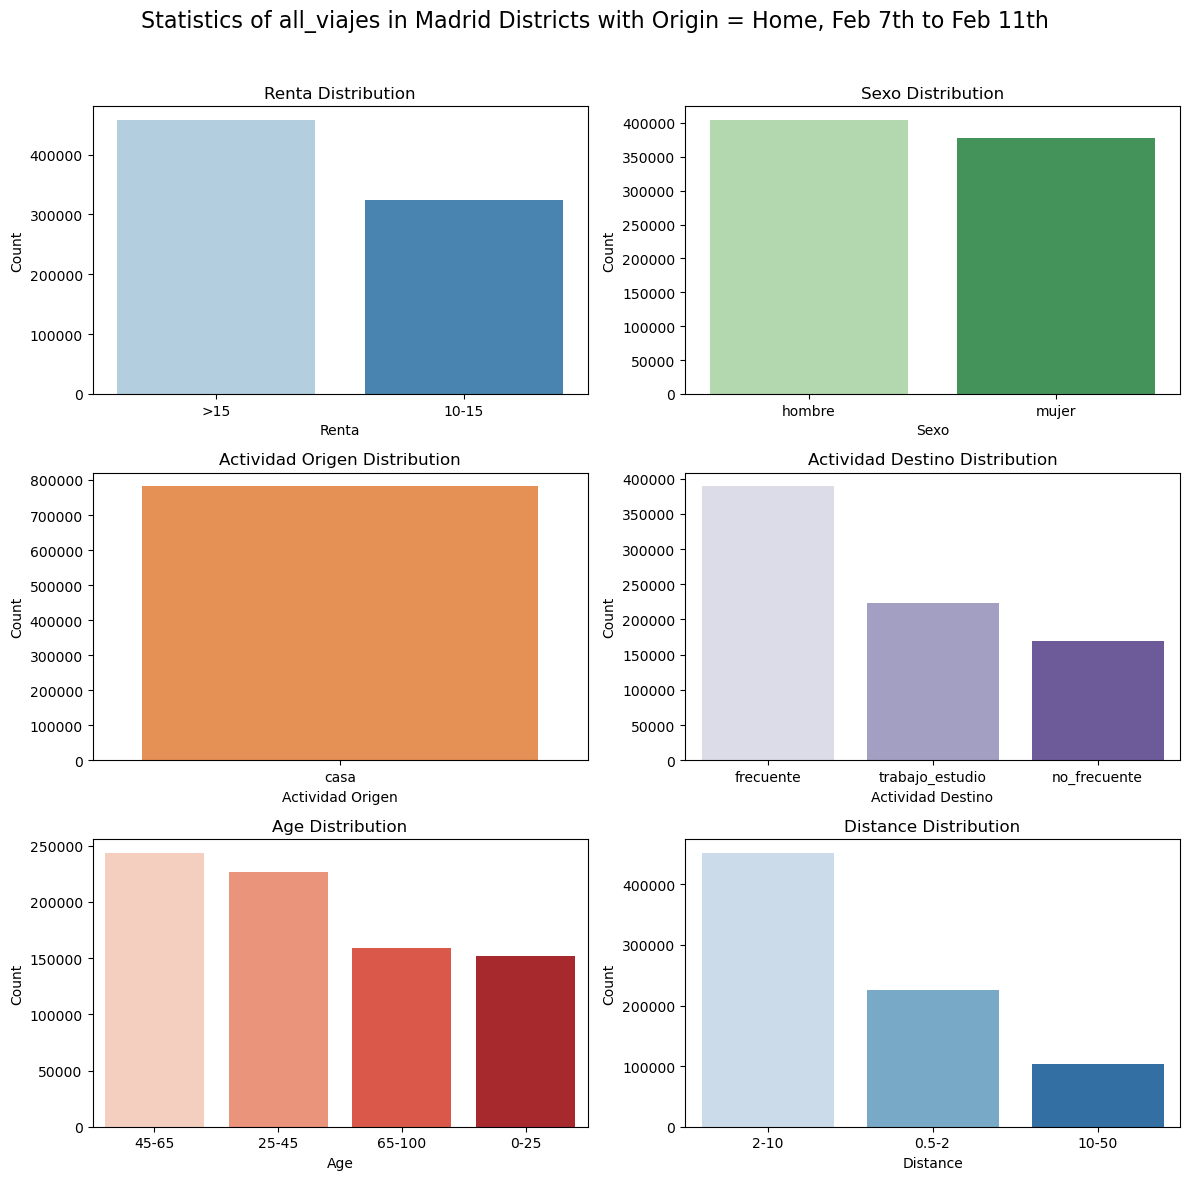

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

subset_of_interest = filtered_df
# Create a 3x2 subplot structure
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Renta distribution
sns.barplot(
    x=subset_of_interest['renta'].value_counts().index,
    y=subset_of_interest['renta'].value_counts().values,
    palette='Blues',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Renta Distribution')
axes[0, 0].set_xlabel('Renta')
axes[0, 0].set_ylabel('Count')

# Sexo distribution
sns.barplot(
    x=subset_of_interest['sexo'].value_counts().index,
    y=subset_of_interest['sexo'].value_counts().values,
    palette='Greens',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Sexo Distribution')
axes[0, 1].set_xlabel('Sexo')
axes[0, 1].set_ylabel('Count')

# Actividad Origen distribution
sns.barplot(
    x=subset_of_interest['actividad_origen'].value_counts().index,
    y=subset_of_interest['actividad_origen'].value_counts().values,
    palette='Oranges',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Actividad Origen Distribution')
axes[1, 0].set_xlabel('Actividad Origen')
axes[1, 0].set_ylabel('Count')

# Actividad Destino distribution
sns.barplot(
    x=subset_of_interest['actividad_destino'].value_counts().index,
    y=subset_of_interest['actividad_destino'].value_counts().values,
    palette='Purples',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Actividad Destino Distribution')
axes[1, 1].set_xlabel('Actividad Destino')
axes[1, 1].set_ylabel('Count')

# Age distribution
sns.barplot(
    x=subset_of_interest['edad'].value_counts().index,
    y=subset_of_interest['edad'].value_counts().values,
    palette='Reds',
    ax=axes[2, 0]
)
axes[2, 0].set_title('Age Distribution')
axes[2, 0].set_xlabel('Age')
axes[2, 0].set_ylabel('Count')

# Distance distribution
sns.barplot(
    x=subset_of_interest['distancia'].value_counts().index,
    y=subset_of_interest['distancia'].value_counts().values,
    palette='Blues',
    ax=axes[2, 1]
)
axes[2, 1].set_title('Distance Distribution')
axes[2, 1].set_xlabel('Distance')
axes[2, 1].set_ylabel('Count')

# Set a main title for the figure
plt.suptitle('Statistics of all_viajes in Madrid Districts with Origin = Home, Feb 7th to Feb 11th', fontsize=16)

# Adjust layout to prevent overlap and make space for the main title
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure as a PNG file
plt.savefig("viajes_madrid_districts_home_origin_070222_110222.png", dpi=300)

# Display the plot
plt.show()
